# Basic R 

In [1]:
1+1

[1] 2

# Load libraries

In [2]:
# We load quantmod for financial data, forecast for time-series models, 
# and ggplot2 for quick data visualization

library(quantmod)
library(forecast)
library(ggplot2)

Loading required package: xts

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: TTR

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



# Fetch financial data

In [3]:
symbol <- "AAPL"
start_date <- "2020-01-01"

getSymbols(symbol, from = start_date, auto.assign = TRUE)
head(AAPL)  # Show the first few rows

[1] "AAPL"

           AAPL.Open AAPL.High AAPL.Low AAPL.Close AAPL.Volume AAPL.Adjusted
2020-01-02   74.0600   75.1500  73.7975    75.0875   135480400      72.79603
2020-01-03   74.2875   75.1450  74.1250    74.3575   146322800      72.08829
2020-01-06   73.4475   74.9900  73.1875    74.9500   118387200      72.66272
2020-01-07   74.9600   75.2250  74.3700    74.5975   108872000      72.32098
2020-01-08   74.2900   76.1100  74.2900    75.7975   132079200      73.48434
2020-01-09   76.8100   77.6075  76.5500    77.4075   170108400      75.04523

# Plot Basic Chart

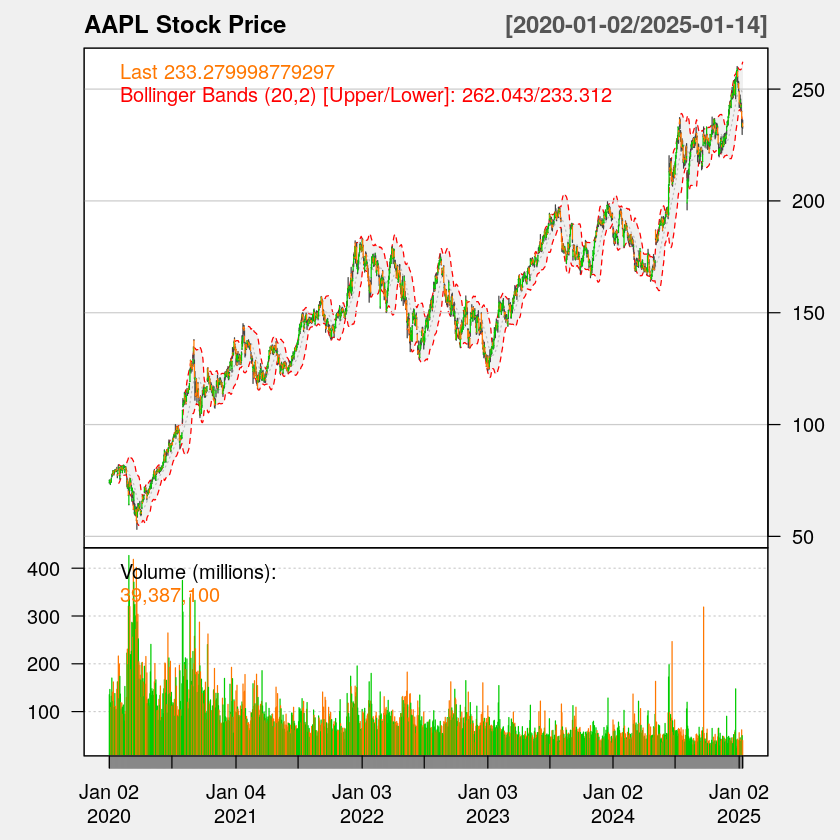

In [5]:
# quantmod's built-in chart
chartSeries(AAPL, 
            theme = chartTheme("white"), 
            name = paste(symbol, "Stock Price"), 
            TA = "addVo();addBBands()")

# Convert to Monthly Returns

In [6]:
# Convert daily prices to monthly returns, for example
AAPL_monthly <- to.monthly(AAPL, indexAt = "lastof", OHLC = FALSE)
AAPL_returns <- monthlyReturn(AAPL_monthly[, "AAPL.Close"])
head(AAPL_returns)

           monthly.returns
2020-01-31      0.00000000
2020-02-29     -0.11679759
2020-03-31     -0.06976146
2020-04-30      0.15537377
2020-05-31      0.08216479
2020-06-30      0.14738625

# Simple Forecast Example 

Series: AAPL_ts 
ARIMA(0,0,0)(0,0,1)[12] with non-zero mean 

Coefficients:
        sma1    mean
      0.2745  0.0227
s.e.  0.1425  0.0126

sigma^2 = 0.006652:  log likelihood = 66.88
AIC=-127.77   AICc=-127.34   BIC=-121.43

Training set error measures:
                       ME       RMSE        MAE  MPE MAPE      MASE      ACF1
Training set -0.001158744 0.08021168 0.06835959 -Inf  Inf 0.8205106 0.1042077

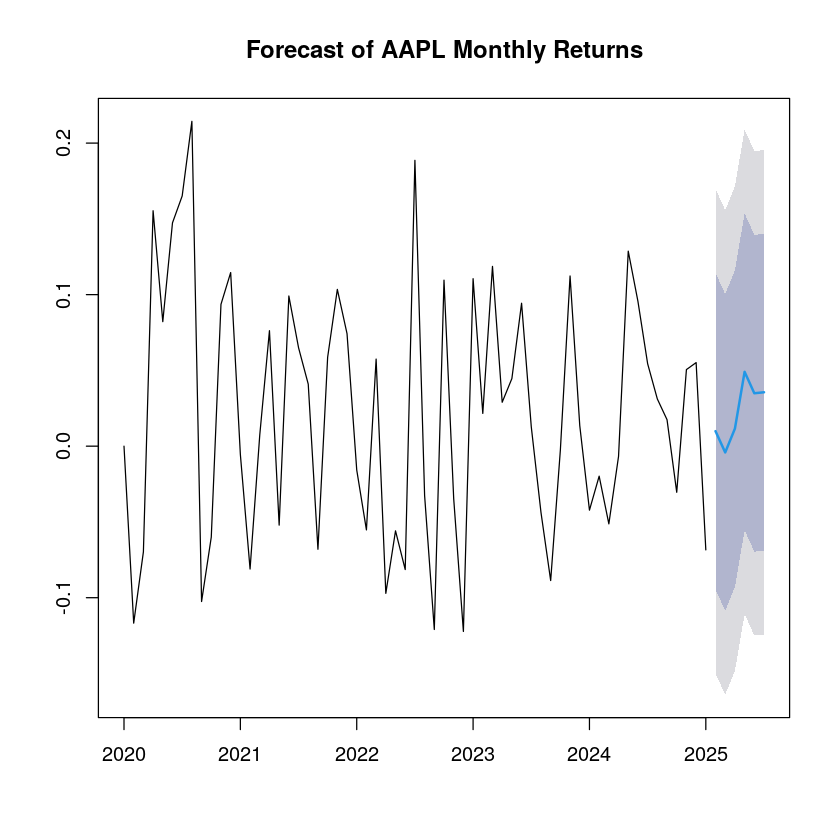

In [7]:
# We'll do a naive forecast on monthly returns (just as an example)
# In reality, you might forecast the price or log-price, etc.

AAPL_ts <- ts(AAPL_returns, frequency = 12, start = c(2020, 1))

# Fit an ARIMA model using 'auto.arima' from forecast package
fit <- auto.arima(AAPL_ts)
summary(fit)

# Forecast next 6 months
fcast <- forecast(fit, h = 6)
plot(fcast, main = "Forecast of AAPL Monthly Returns")

# Quick ggplot Visualization of Monthly Returns


######################### Warning from 'xts' package ##########################
#                                                                             #
# The dplyr lag() function breaks how base R's lag() function is supposed to  #
# work, which breaks lag(my_xts). Calls to lag(my_xts) that you type or       #
# source() into this session won't work correctly.                            #
#                                                                             #
# Use stats::lag() to make sure you're not using dplyr::lag(), or you can add #
# conflictRules('dplyr', exclude = 'lag') to your .Rprofile to stop           #
# dplyr from breaking base R's lag() function.                                #
#                                                                             #
# Code in packages is not affected. It's protected by R's namespace mechanism #
# Set `options(xts.warn_dplyr_breaks_lag = FALSE)` to suppress this warning.  #
#                                      

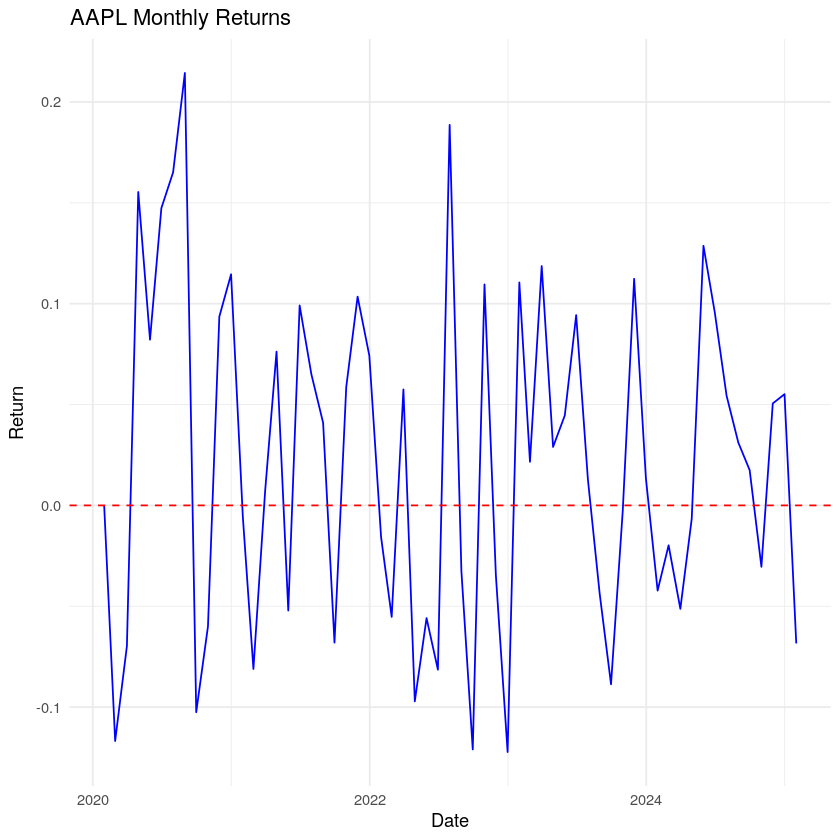

In [8]:
# We'll transform the data into a data frame for ggplot2
library(dplyr)

df_returns <- data.frame(
  date = as.Date(time(AAPL_returns)),
  returns = as.numeric(AAPL_returns)
)

ggplot(df_returns, aes(x = date, y = returns)) +
  geom_line(color = "blue") +
  geom_hline(yintercept = 0, color = "red", linetype = "dashed") +
  labs(
    title = "AAPL Monthly Returns",
    x = "Date",
    y = "Return"
  ) +
  theme_minimal()